In [12]:
from massimal.hyspec_io import load_envi_image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.decomposition import PCA

In [13]:
# Paths
spec_dir = Path('M:\\PosterGeoHab2024\\vega_sola\\hyperspec\\spectra')
header_files = sorted([file for file in spec_dir.rglob('*.hdr')])

In [14]:
# Parameters
wl_min = 400
wl_max = 700 #750 

class_names = ['Sand','Bedrock','Maerl','Rockweed','Chorda','BrownAlgae','Kelp']
rgb_mod_wl = [640,570,500]

In [15]:
# Open all spectra, save as array
X = []
X_labels = []
for file in header_files:
    spectrum, wl, rgb_ind_orig, metadata = load_envi_image(file)
    X.append(np.squeeze(spectrum))
    X_labels.append(metadata['label'])
X = np.array(X)

wl_ind = (wl>= wl_min) & (wl <= wl_max)
wl = wl[wl_ind]
X = X[:,wl_ind]

In [16]:
# Create label vector
y = np.zeros(X.shape[0])
y_name = dict()
for i,class_name in enumerate(class_names):
    class_index = [class_name in label for label in X_labels]
    y[class_index] = i+1
    y_name[i+1] = class_name
print(y)
print(y_name)

[2. 2. 2. 2. 2. 6. 6. 6. 6. 6. 6. 6. 5. 5. 5. 5. 0. 7. 7. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 4. 4. 4. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
{1: 'Sand', 2: 'Bedrock', 3: 'Maerl', 4: 'Rockweed', 5: 'Chorda', 6: 'BrownAlgae', 7: 'Kelp'}


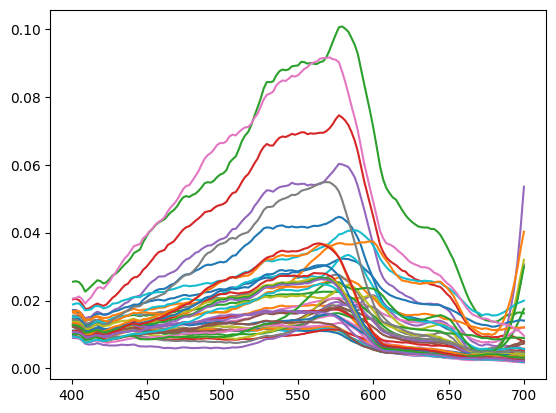

In [17]:
# Show all spectra
plt.plot(wl,X.T)
plt.show()

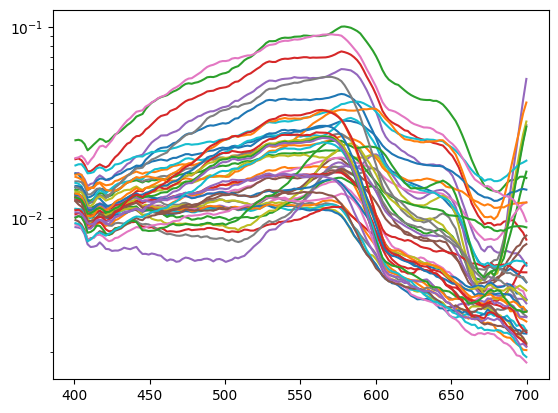

In [18]:
# Show all spectra on log scale
plt.semilogy(wl,X.T)
plt.show()

In [19]:
# Find RGB percentiles
rgb_ind = tuple([np.argmin(np.abs(wl-rgb_wl)) for rgb_wl in rgb_mod_wl])
rgb_percentiles = np.percentile(X[:,rgb_ind],(2,98),axis=0)
print(f'{rgb_ind=}')
print(f'{rgb_percentiles}')

rgb_ind=(116, 83, 49)
[[0.00350646 0.01104242 0.00747073]
 [0.02975183 0.09185067 0.0585532 ]]


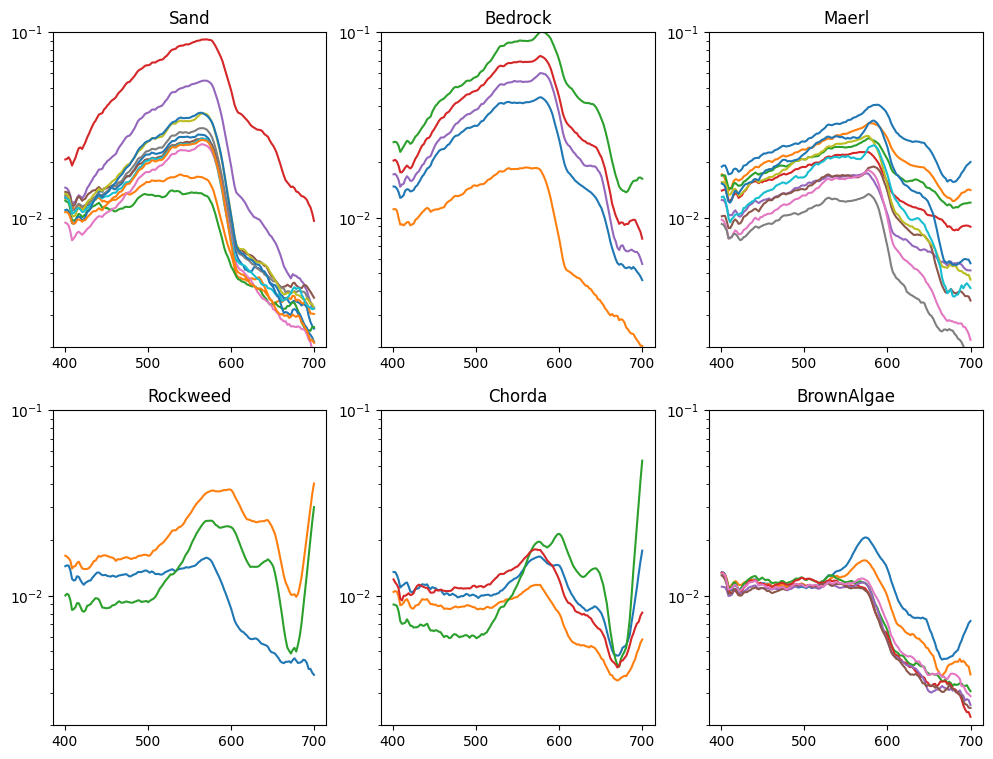

In [8]:
# Plot spectra grouped by class
classes = ['Sand','Bedrock','Maerl','Rockweed','Chorda','BrownAlgae']
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(12,9))
for i,classname in enumerate(classes):
    class_index = [classname in label for label in X_labels]
    col = i % 3
    row = i // 3
    ax[row][col].semilogy(wl,X[class_index].T)
    ax[row][col].set_ylim([0.002,0.1])
    ax[row][col].set_title(classname)
plt.show()


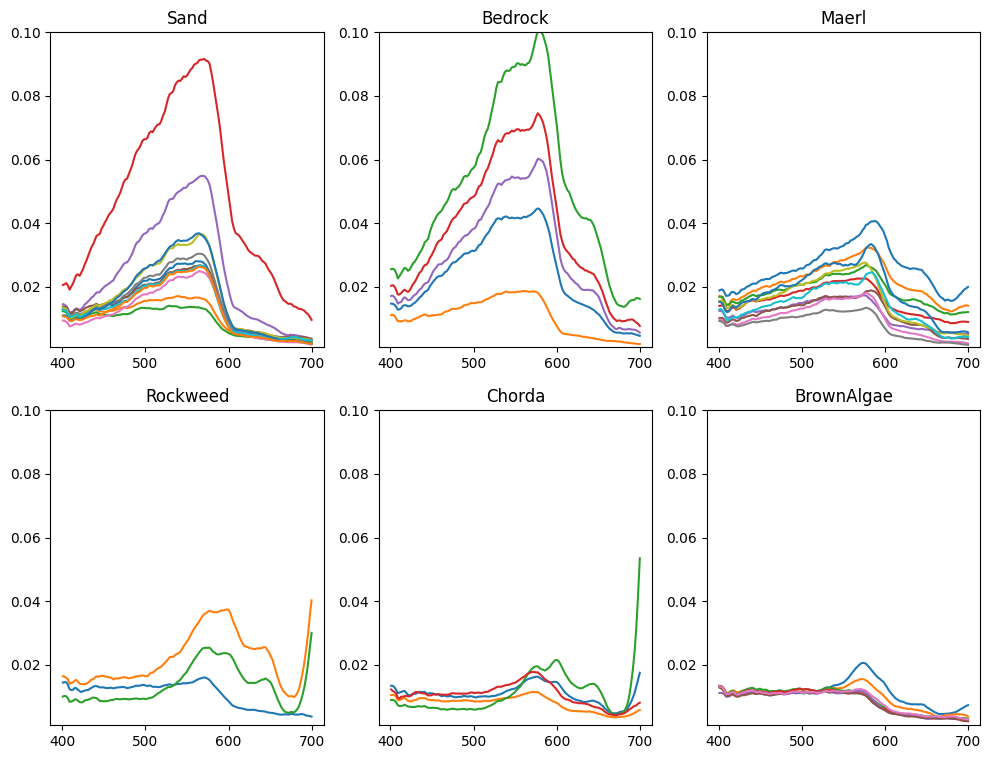

In [9]:
# Plot spectra grouped by class (linear)
classes = ['Sand','Bedrock','Maerl','Rockweed','Chorda','BrownAlgae']
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(12,9))
for i,classname in enumerate(classes):
    class_index = [classname in label for label in X_labels]
    col = i % 3
    row = i // 3
    ax[row][col].plot(wl,X[class_index].T)
    ax[row][col].set_ylim([0.001,0.1])
    ax[row][col].set_title(classname)
plt.show()

In [10]:
pca = PCA(n_components=8)
spec_pca = pca.fit_transform(X)

In [11]:
# plt.plot(pca.explained_variance_ratio_)
# plt.show()

In [12]:
pca_log = PCA(n_components=8)
spec_pca_log = pca_log.fit_transform(np.log(X))

[74.83 21.09 2.65 0.83 0.35 0.09 0.03 0.03] %


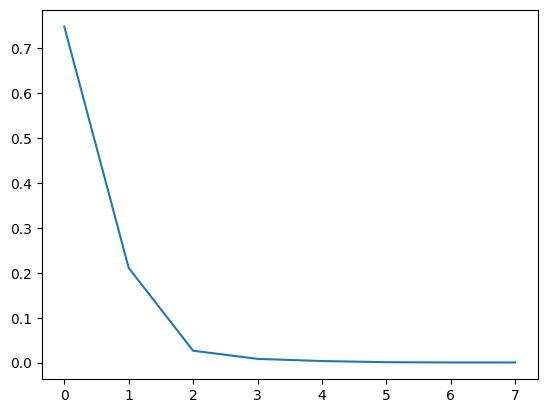

In [27]:
print(np.array2string(pca_log.explained_variance_ratio_*100,formatter={'float': lambda x: f'{x:.2f}'}) + ' %')
plt.plot(pca_log.explained_variance_ratio_)
plt.show()

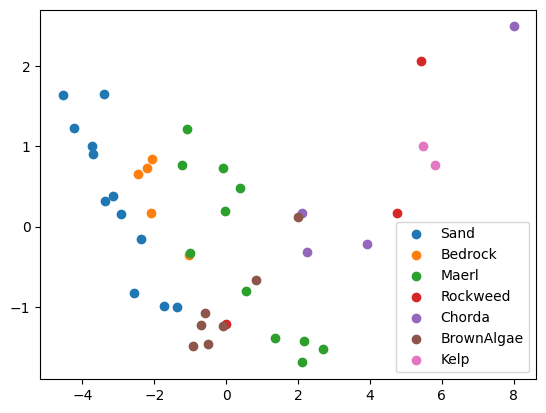

In [14]:
# Scatter plot of PCA components based on logarithmic spectra
plt.figure()
for i in y_name:
    y_ind = (y==i)
    plt.gca().scatter(spec_pca_log[y_ind,1],spec_pca_log[y_ind,2],label=y_name[i])
plt.legend()
plt.show()

In [15]:
# plt.figure()
# for i in y_name:
#     y_ind = (y==i)
#     plt.gca().scatter(spec_pca[y_ind,1],spec_pca[y_ind,2],label=y_name[i])
# plt.legend()
# plt.show()

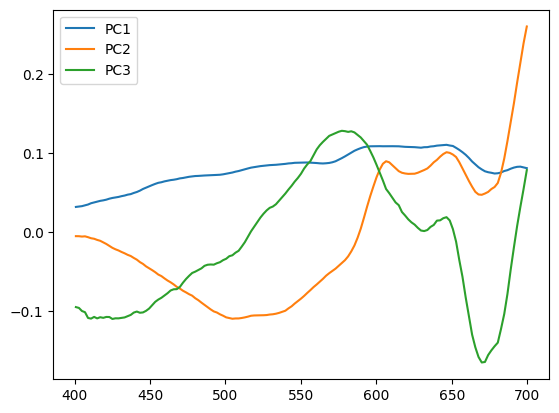

In [31]:
# Show first PCA components
for i in range(3):
    plt.plot(wl,pca_log.components_[i],label=f'PC{i+1}')
plt.legend()
plt.show()